<font face = "Verdana" size = "4">  Name : Kundan Patil <br>
    Email id: patilkundan.1718@gmail.com <br>
    contact: +91 8485010139 <br>
    linkedIn: www.linkedin.com/in/kundanpatilds<br>
    Github: https://github.com/patilkundan?tab=repositories

<font face = "Verdana" size = "5"> <h1> Q. 7 Write Python Programming for given Dataset “3Classdata.csv” and 2Classdata.csv</h1>
<font face = "Verdana" size = "3"> Expected Output:
<br> 1. Need to use required libraries<br>
		         2. Apply Classification Algorithm and calculate performance score<br>

In [24]:
#Let's start with importing required libraries 
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from scipy import stats
import warnings

In [99]:
df = pd. read_csv ("2Classdata.csv") # Reading the Data
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [100]:
df.shape

(310, 7)

In [101]:
df['class'].unique()

array(['Abnormal', 'Normal'], dtype=object)

In [102]:
df.info() #df.dtypes also this way can be done 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [103]:
df.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [104]:
duplicate = df[df.duplicated()]
print("Duplicate Rows :")

Duplicate Rows :


In [105]:
def EDA(df,i): # create a function for Continuous variables
    plt.figure(figsize=(20,5),facecolor='#FFCBA4')
    plt.subplot(1,2,1)
    sns.histplot(x=i,data=df,kde=True)
    plt.subplot(1,2,2)
    sns.boxplot(y=i,data=df)
    plt.show()
    print('skewness of' ,i, 'column--->' ,df[i].skew() )

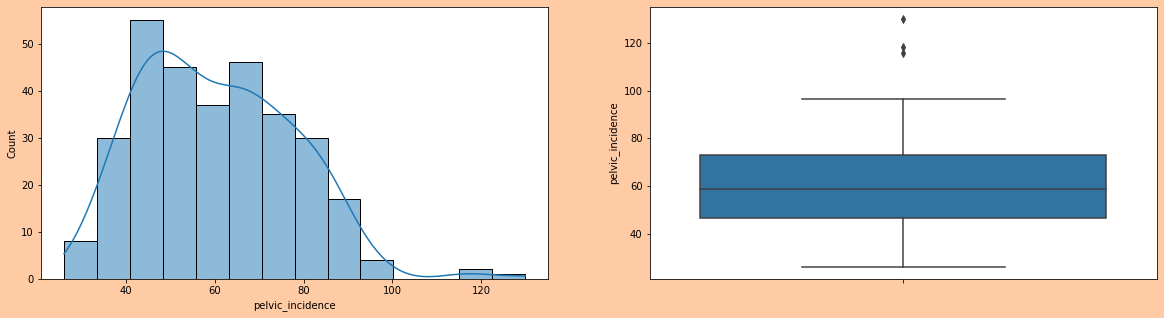

skewness of pelvic_incidence column---> 0.5204398948625644


In [106]:
EDA(df,'pelvic_incidence')

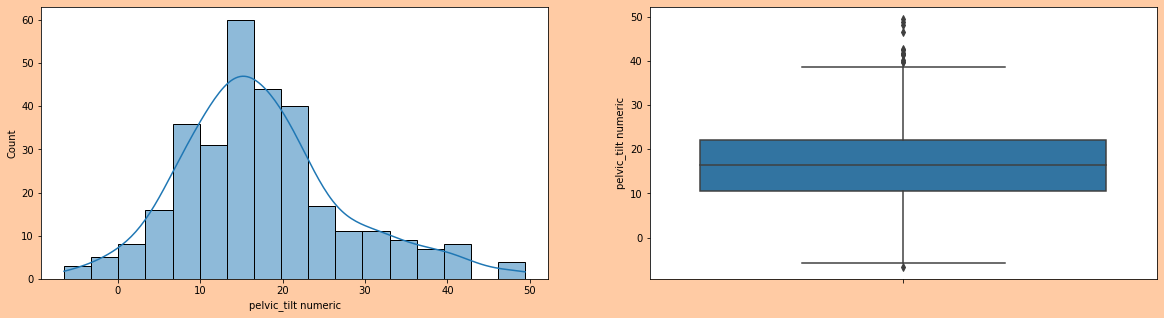

skewness of pelvic_tilt numeric column---> 0.6765533590425815


In [107]:
EDA(df,'pelvic_tilt numeric')

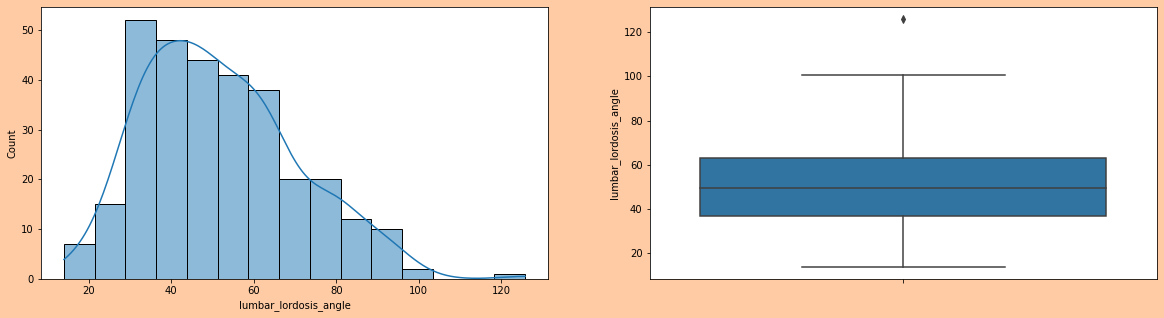

skewness of lumbar_lordosis_angle column---> 0.5994514775939379


In [108]:
EDA(df,'lumbar_lordosis_angle')

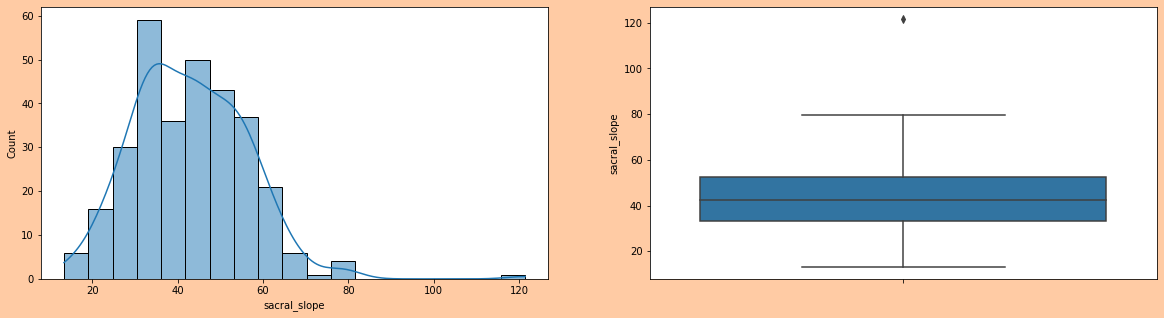

skewness of sacral_slope column---> 0.7925766941630668


In [109]:
EDA(df,'sacral_slope')

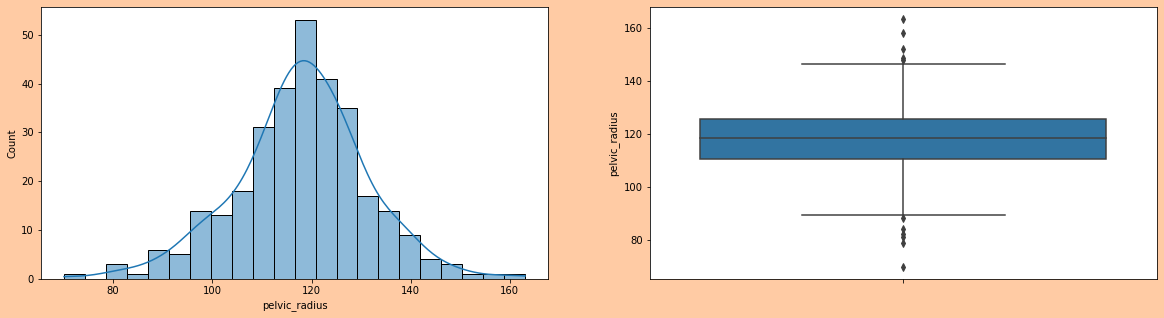

skewness of pelvic_radius column---> -0.17683486805355644


In [110]:
EDA(df,'pelvic_radius')

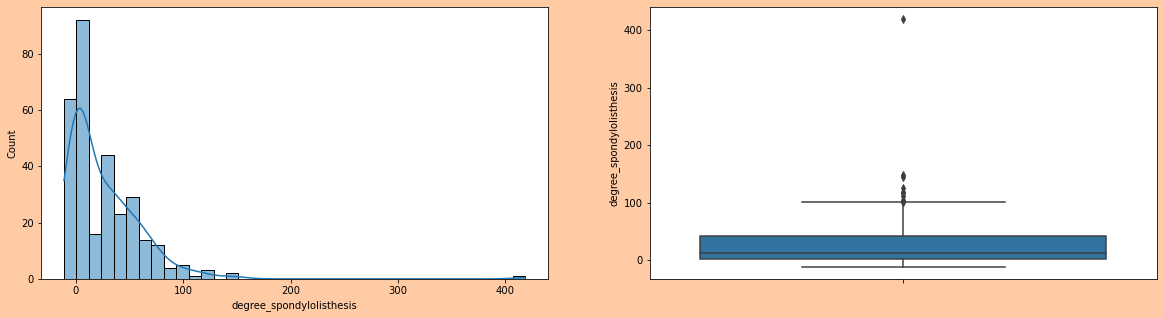

skewness of degree_spondylolisthesis column---> 4.317953644012235


In [111]:
EDA(df,'degree_spondylolisthesis')

###  Lets check out target varible is imbalanced or not ...!
- because this is binary classification problem so  we must  have balanced data set

<AxesSubplot:xlabel='class', ylabel='count'>

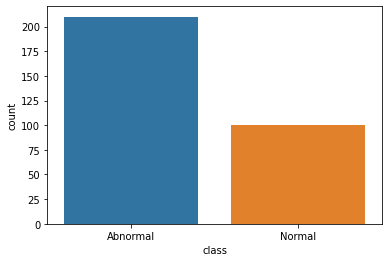

In [112]:
sns.countplot(x='class',data=df)

In [113]:
df['class'].unique()

array(['Abnormal', 'Normal'], dtype=object)

#### Yes data set is balanced

# Encoding the target varible

In [114]:
df['class']=df['class'].replace('Normal', 0)
df['class']=df['class'].replace('Abnormal', 1)

#  Outliers treatment 

#### There are several ways to treat outliers when working with data. 
- 1) delete the outlires 
        Z-score method 
        IQR method

- 2) Transforming the outlires
        log or the square root, can help reduce the impact of outliers

In [115]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer (method='box-cox')
df['pelvic_incidence'] = scaler.fit_transform(df[['pelvic_incidence']].values)

In [116]:
df['pelvic_incidence'].skew()

-0.011150581982432725

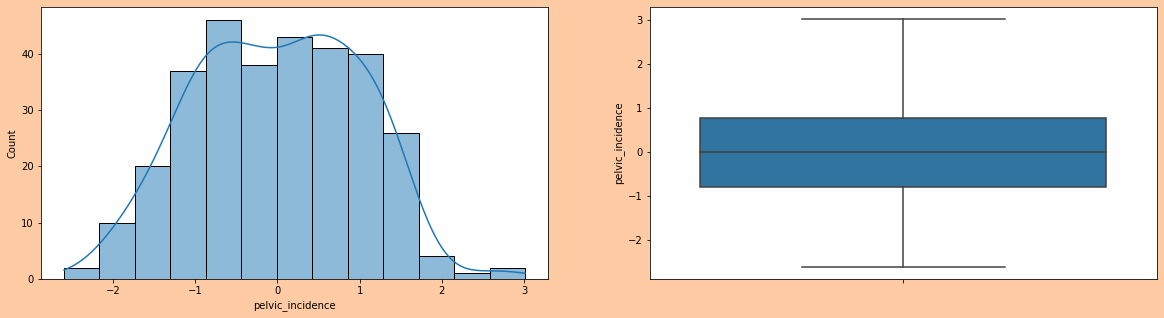

skewness of pelvic_incidence column---> -0.011150581982432725


In [117]:
EDA(df,'pelvic_incidence')

In [118]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer (method='yeo-johnson')
df['pelvic_tilt numeric'] = scaler.fit_transform(df[['pelvic_tilt numeric']].values)

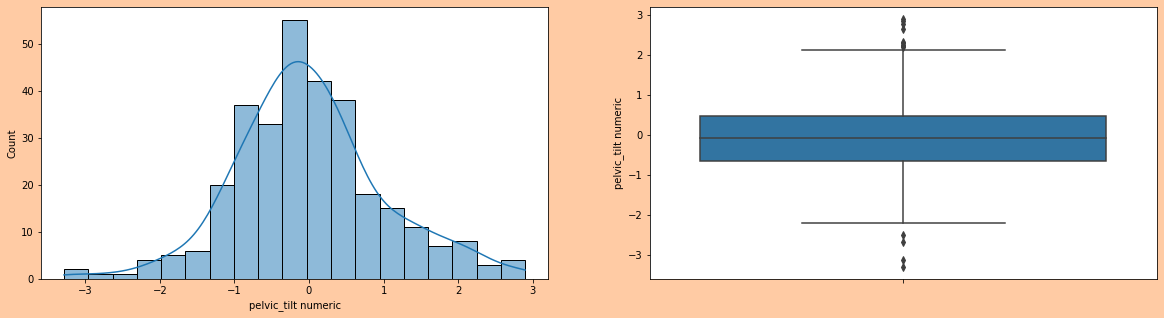

skewness of pelvic_tilt numeric column---> 0.2273319485942726


In [119]:
EDA(df,'pelvic_tilt numeric')

In [120]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer (method='box-cox')
df['lumbar_lordosis_angle'] = scaler.fit_transform(df[['lumbar_lordosis_angle']].values)

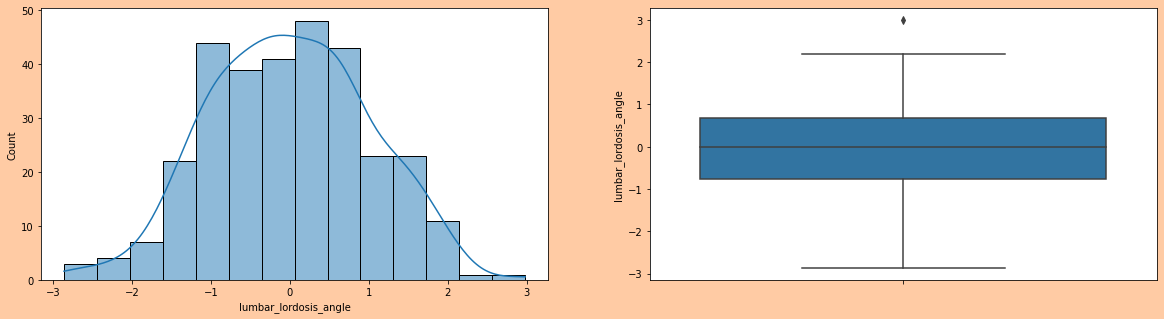

skewness of lumbar_lordosis_angle column---> -0.010697570815072556


In [121]:
EDA(df,'lumbar_lordosis_angle')

In [122]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer (method='box-cox')
df['sacral_slope'] = scaler.fit_transform(df[['sacral_slope']].values)

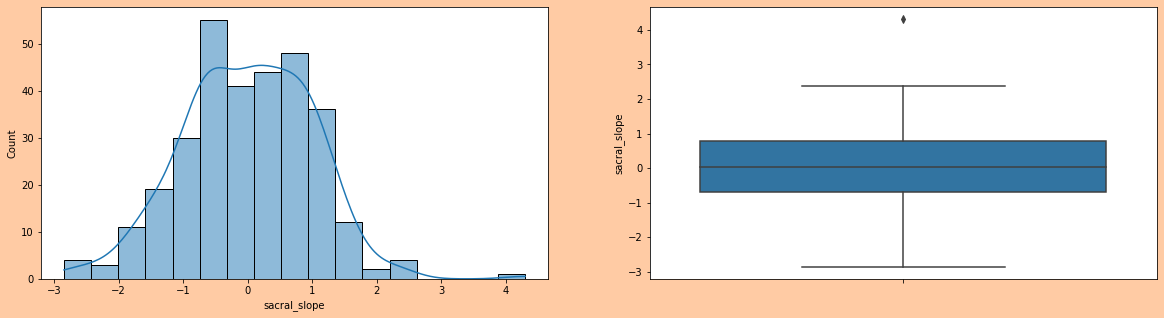

skewness of sacral_slope column---> 0.020529522618659736


In [123]:
EDA(df,'sacral_slope')

In [124]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer (method='box-cox')
df['pelvic_radius'] = scaler.fit_transform(df[['pelvic_radius']].values)

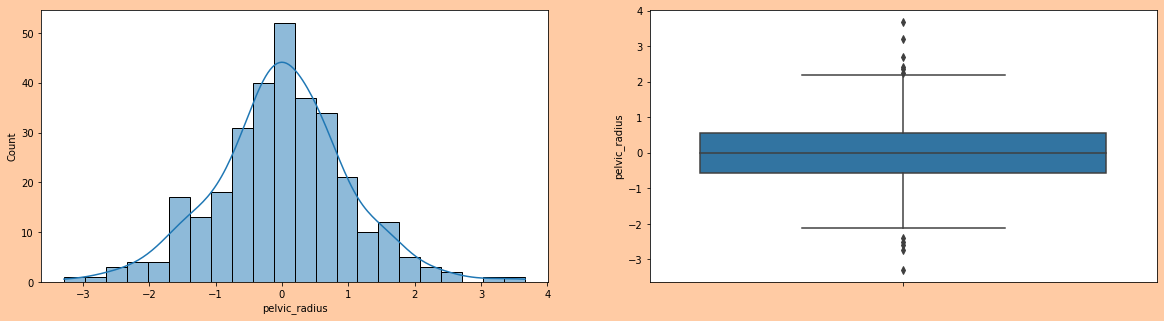

skewness of pelvic_radius column---> 0.04470701353253126


In [125]:
EDA(df,'pelvic_radius')

In [128]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer (method='yeo-johnson')
df['degree_spondylolisthesis'] = scaler.fit_transform(df[['degree_spondylolisthesis']].values)

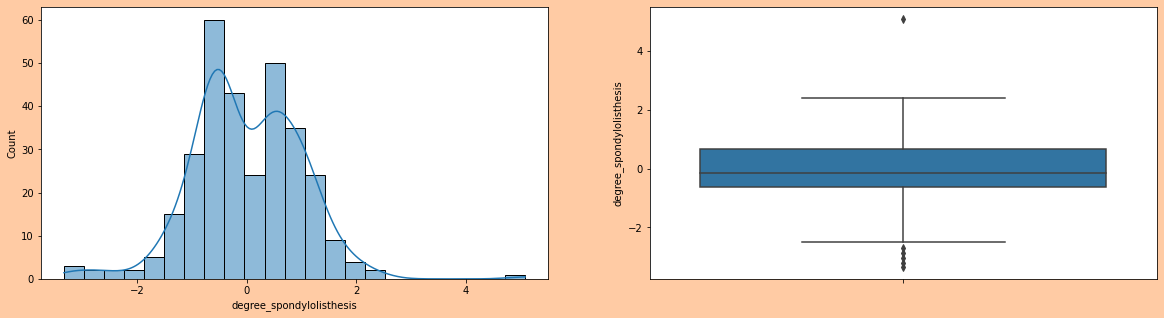

skewness of degree_spondylolisthesis column---> 0.10770868217363619


In [129]:
EDA(df,'degree_spondylolisthesis')

# Relationship exploration: Categorical Vs Continuous -- Box Plots


When variable is Continuous and the label/target variable is Categorical we analyze the relation using Boxplots and measure the strength of relation using Anova test

<AxesSubplot:title={'center':'pelvic_incidence'}, xlabel='class'>

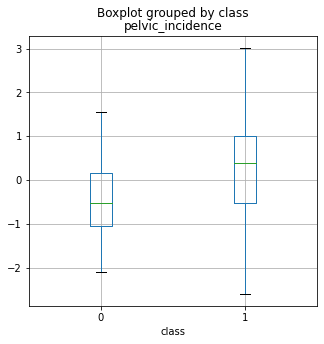

In [141]:
df.boxplot(column='pelvic_incidence', by='class', figsize=(5,5), vert=True)

<AxesSubplot:title={'center':'pelvic_tilt numeric'}, xlabel='class'>

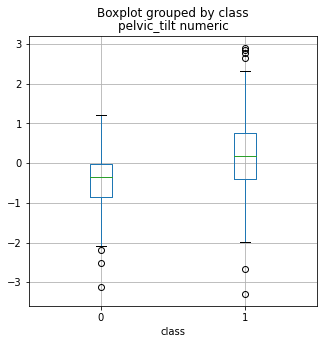

In [142]:
df.boxplot(column='pelvic_tilt numeric', by='class', figsize=(5,5), vert=True)

<AxesSubplot:title={'center':'lumbar_lordosis_angle'}, xlabel='class'>

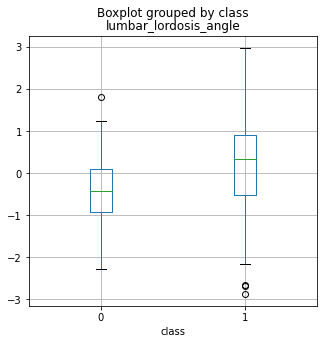

In [143]:
df.boxplot(column='lumbar_lordosis_angle', by='class', figsize=(5,5), vert=True)

<AxesSubplot:title={'center':'sacral_slope'}, xlabel='class'>

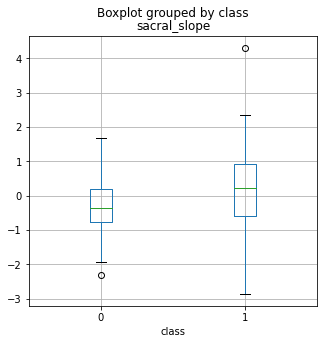

In [144]:
df.boxplot(column='sacral_slope', by='class', figsize=(5,5), vert=True)

<AxesSubplot:title={'center':'pelvic_radius'}, xlabel='class'>

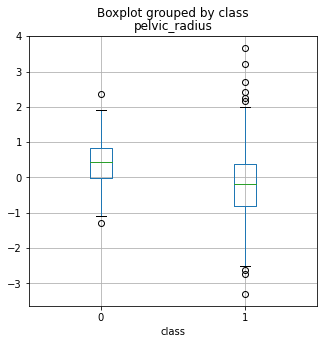

In [147]:
df.boxplot(column='pelvic_radius', by='class', figsize=(5,5), vert=True)

<AxesSubplot:title={'center':'degree_spondylolisthesis'}, xlabel='class'>

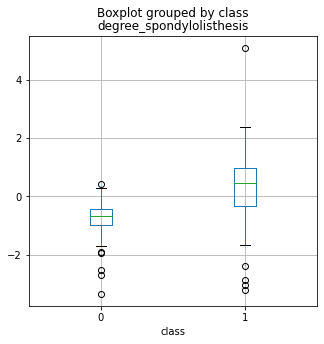

In [140]:
df.boxplot(column='degree_spondylolisthesis', by='class', figsize=(5,5), vert=True)

Box-Plots interpretation
What should you look for in these box plots?

These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

On the other hand if the distribution is different for each category(the boxes are not in same line!). It hints that these variables might be correlated with Rating.

In this data, all three categorical predictors looks correlated with the Target variable.

We confirm this by looking at the results of ANOVA test below

## Checking the relation with target variable
- relation can be check by using visualization techniques
- statistical tools (Corr,Anova Test, Chi2)



Here we are using anova test 
because we have categorical vs continuous for this type of scenario ANOVA performance well

Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric varible  is same for all the groups in the categorical target variable)
ANOVA Test result: Probability of H0 being true

In [149]:
# get all the continuous columns name
num_cols = list(df.select_dtypes(exclude='object').columns)
print(f'Continuous columns: {num_cols}')

Continuous columns: ['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class']


In [150]:
categorical_col =['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', ]

In [151]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, categorical_col):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in categorical_col:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(TargetVariable, 'is correlated with', predictor, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(TargetVariable, 'is NOT correlated with', predictor, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors) 

In [152]:
FunctionAnova(inpData=df, 
              TargetVariable='class', 
              categorical_col=categorical_col)

##### ANOVA Results ##### 

class is correlated with pelvic_incidence | P-Value: 2.97444222457454e-10
class is correlated with pelvic_tilt numeric | P-Value: 7.3276004791601866e-09
class is correlated with lumbar_lordosis_angle | P-Value: 1.3034613241263046e-07
class is correlated with sacral_slope | P-Value: 0.000665309055218086
class is correlated with pelvic_radius | P-Value: 4.166406479179887e-08
class is correlated with degree_spondylolisthesis | P-Value: 1.5372258010635345e-23


['pelvic_incidence',
 'pelvic_tilt numeric',
 'lumbar_lordosis_angle',
 'sacral_slope',
 'pelvic_radius',
 'degree_spondylolisthesis']

The results of ANOVA confirm that our visual analysis using box plots above.

All continuous variables are correlated with the Target variable. 

# Now Its time to check  multicollinearity in our data set 

In [153]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Finding variance inflation factor in each scaled column i.e X_scaled.shape [1] (1/(1-R2))
vif = pd.DataFrame()
vif["vif"]= [variance_inflation_factor (df, i) for i in range (df.shape[1])]
vif["Features"] = df. columns
#Let's check the values

In [154]:
vif

,vif,Features
0,106.893700,pelvic_incidence
1,35.838951,pelvic_tilt numeric
2,2.660915,lumbar_lordosis_angle
3,62.474009,sacral_slope
4,1.212631,pelvic_radius
5,1.979380,degree_spondylolisthesis
6,1.143276,class


<font face = "Verdana" size = "2"> 
Note,
<br>1) std value for vif is 5
<br>2) if vif value is > 5 then there possibilities multicollinearity problem
<br>3) std value for vif can be different by project / it depend on data set or project
<br>Conclusion :  That means there is multicollinearity problem exist in our data set .

 #### We need to drop correlated function 

<AxesSubplot:>

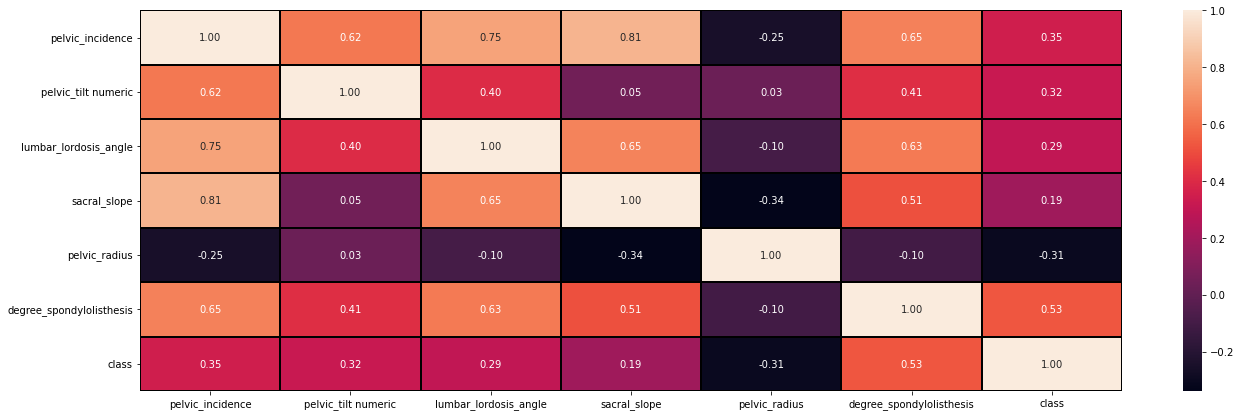

In [156]:
plt.figure(figsize=(22,7)) # ploting the heat map
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

# with the following function we can select highly correlated features

In [157]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [159]:
corr_features = correlation(df, 0.7)
len(set(corr_features))

2

In [160]:
corr_features # 80% highly correlated features name

{'lumbar_lordosis_angle', 'sacral_slope'}

In [161]:
df.drop (columns = ['sacral_slope'],inplace=True,)

In [162]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Finding variance inflation factor in each scaled column i.e X_scaled.shape [1] (1/(1-R2))
vif = pd.DataFrame()
vif["vif"]= [variance_inflation_factor (df, i) for i in range (df.shape[1])]
vif["Features"] = df. columns
#Let's check the values

In [163]:
vif

,vif,Features
0,4.024323,pelvic_incidence
1,1.818716,pelvic_tilt numeric
2,2.634955,lumbar_lordosis_angle
3,1.212520,pelvic_radius
4,1.979290,degree_spondylolisthesis
5,1.140573,class


 Now its fine 

### Now we have finalized the final  predictors for ML so we are moving towards model buliding 

We are not applying scaling technique as we have already  used log transformation

# Seprate the features and label 

In [167]:
f = df.drop (columns = ['class'])
l = df[ 'class']

In [168]:
log_reg = LogisticRegression ()

In [169]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(f,l,test_size=.30,random_state=i)
    log_reg.fit(x_train,y_train)
    pred=log_reg.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.8817204301075269 Random state:- 55


In [170]:
x_train,x_test,y_train,y_test= train_test_split(f , l, test_size= 0.25, random_state = 55)

In [171]:
log_reg.fit(x_train, y_train)

LogisticRegression()

In [172]:
from sklearn.metrics import classification_report

In [173]:
y_pred = log_reg.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [174]:
#Model Accuracy
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8846153846153846

In [175]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[22,  6],
       [ 3, 47]], dtype=int64)

In [176]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        28
           1       0.89      0.94      0.91        50

    accuracy                           0.88        78
   macro avg       0.88      0.86      0.87        78
weighted avg       0.88      0.88      0.88        78



In [180]:
cross_val_score (log_reg, f, l, cv=7)

array([0.55555556, 0.68888889, 0.77272727, 0.90909091, 0.84090909,
       0.84090909, 0.86363636])

In [185]:
cross_val_score (log_reg, f, l, cv=7).mean()

0.7816738816738816

# Lets use Ensemble approch
####  Bagging and boosting

In [186]:
from sklearn.ensemble import BaggingClassifier

In [187]:
bag_knn = BaggingClassifier(
                             KNeighborsClassifier (n_neighbors=5), # value of k = 5 
                             n_estimators=9, max_samples=0.7, # n_estimators means 9 model you have build 
                             bootstrap=True, random_state=3, oob_score=True
                            )

In [188]:
bag_knn.fit (x_train, y_train)
bag_knn.score (x_test, y_test)

0.8333333333333334

In [189]:
from sklearn.ensemble import RandomForestClassifier

In [190]:
# Write one function and call as many as times to check accuracy_score of different models
def metric_score (clf, x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = clf.predict (x_train)
        print("\n================Train Result=====")
        print (f"Accuracy Score: {accuracy_score(y_train, y_pred) * 100:.2f}%")
    elif train==False:
        pred = clf.predict(x_test)
        print("\n=================Test Result================")
        print (f"Accuracy Score: {accuracy_score(y_test, pred)* 100:.2f}%")
        print ('\n \n Test Classification Report \n', classification_report(y_test, pred, digits=2)) ## Model confidence/accuracy

In [191]:
# Initiate Decision Tree Classifier with new parameters and train
random_clf = RandomForestClassifier()
# Train the model
random_clf.fit(x_train,y_train)

RandomForestClassifier()

In [192]:
# Call the function and pass dataset to check train and test score
metric_score (random_clf,x_train, x_test, y_train,y_test, train=True) # This is for training socre
 # This is for testing score
metric_score(random_clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=====
Accuracy Score: 100.00%

=================Test Result================
Accuracy Score: 92.31%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        28
           1       0.96      0.92      0.94        50

    accuracy                           0.92        78
   macro avg       0.91      0.92      0.92        78
weighted avg       0.93      0.92      0.92        78



 this is the one the most problem with  random forest .... maximum time it's tends to overfit becuse it is rule base algorithum

 <font face = "Verdana" size = "3">Lets Use Boosting<br>
<b>Within the boosting we have few algorithms we are going to work on that</b><br>
           <font face = "Verdana" size = "3"><mark>1) Adaptive boosting 2) Gradient boosting3)XGB

In [197]:
from sklearn.ensemble import AdaBoostClassifier

In [199]:
ada = AdaBoostClassifier()

In [200]:
x_train,x_test,y_train,y_test= train_test_split(f , l, test_size= 0.25, random_state = 50)

In [201]:
ada. fit (x_train,y_train)

AdaBoostClassifier()

In [202]:
ada.fit (x_train, y_train)
ada.score (x_test, y_test)

0.8076923076923077

In [203]:
#graident boosting classifier
from sklearn.ensemble import GradientBoostingClassifier # GradientBoostingRegressor If we have regression problem 
from sklearn.metrics import classification_report , accuracy_score

In [208]:
# initiate GradientBoostingClassifier
gbdt_clf = GradientBoostingClassifier()


In [207]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(f,l,test_size=.30,random_state=i)
    gbdt_clf.fit(x_train,y_train)
    pred=gbdt_clf.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.8924731182795699 Random state:- 37


In [209]:
x_train,x_test,y_train,y_test= train_test_split(f , l, test_size= 0.25, random_state = 37)

In [210]:
gbdt_clf.fit(x_train, y_train)

GradientBoostingClassifier()

In [211]:
def mertric_Score (clf,XX_train,XX_test,y_train,y_test,train= True):
    if train:
        y_pred=clf.predict(XX_train)
        print('=== Training Score ===')
        print(f"Accuracy score : {accuracy_score(y_train,y_pred)*100 : 2f} %")
        
    elif train==False:
        pred = clf.predict(XX_test)
        print('=== Testing Score ===')
        print(f"Accuracy Score : {accuracy_score(y_test,pred)*100 : 2f}%")
        
        print ('\n \n Classification Report \n' , classification_report(y_test,pred,digits=2))

In [217]:
# call the function
mertric_Score(gbdt_clf,x_train,x_test,y_train,y_test,train=True)
mertric_Score(gbdt_clf,x_train,x_test,y_train,y_test,train=False)

=== Training Score ===
Accuracy score :  100.000000 %
=== Testing Score ===
Accuracy Score :  87.179487%

 
 Classification Report 
               precision    recall  f1-score   support

           0       0.84      0.70      0.76        23
           1       0.88      0.95      0.91        55

    accuracy                           0.87        78
   macro avg       0.86      0.82      0.84        78
weighted avg       0.87      0.87      0.87        78



In [218]:
cross_val_score (gbdt_clf, f, l, cv=5)

array([0.56451613, 0.72580645, 0.87096774, 0.90322581, 0.85483871])

In [219]:
cross_val_score (gbdt_clf, f, l, cv=5).mean()

0.7870967741935485

### That is How we have Build the multile models on given  data set and performance score has been shown  with respect to all model s

## Scope  for the Improvement 

#### 1) we can improv the model  accuracy  by tunning the hyperprameter of models<br>
#### 2) later on we can plot AUC ROC curve to select the best  model (generalized model)

Thank you....!